In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
# Cargar datos
df = pd.read_csv('sample_data/data.csv')
df.head()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [18]:
print("Forma inicial:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores faltantes:")
print(df.isnull().sum())
print("\nEstadísticas descriptivas:")
print(df.describe())

Forma inicial: (1388, 5)

Tipos de datos:
Socioeconomic Score    float64
Study Hours            float64
Sleep Hours            float64
Attendance (%)         float64
Grades                 float64
dtype: object

Valores faltantes:
Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64

Estadísticas descriptivas:
       Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  \
count          1388.000000  1388.000000  1388.000000     1388.000000   
mean              0.552274     4.560807     8.047262       58.536023   
std               0.261272     1.897581     1.370700       11.675287   
min               0.101280     0.800000     4.800000       40.000000   
25%               0.322118     3.475000     7.000000       49.000000   
50%               0.545945     3.900000     8.400000       57.000000   
75%               0.789610     5.900000     9.100000       66.000000   
max               0.999820 

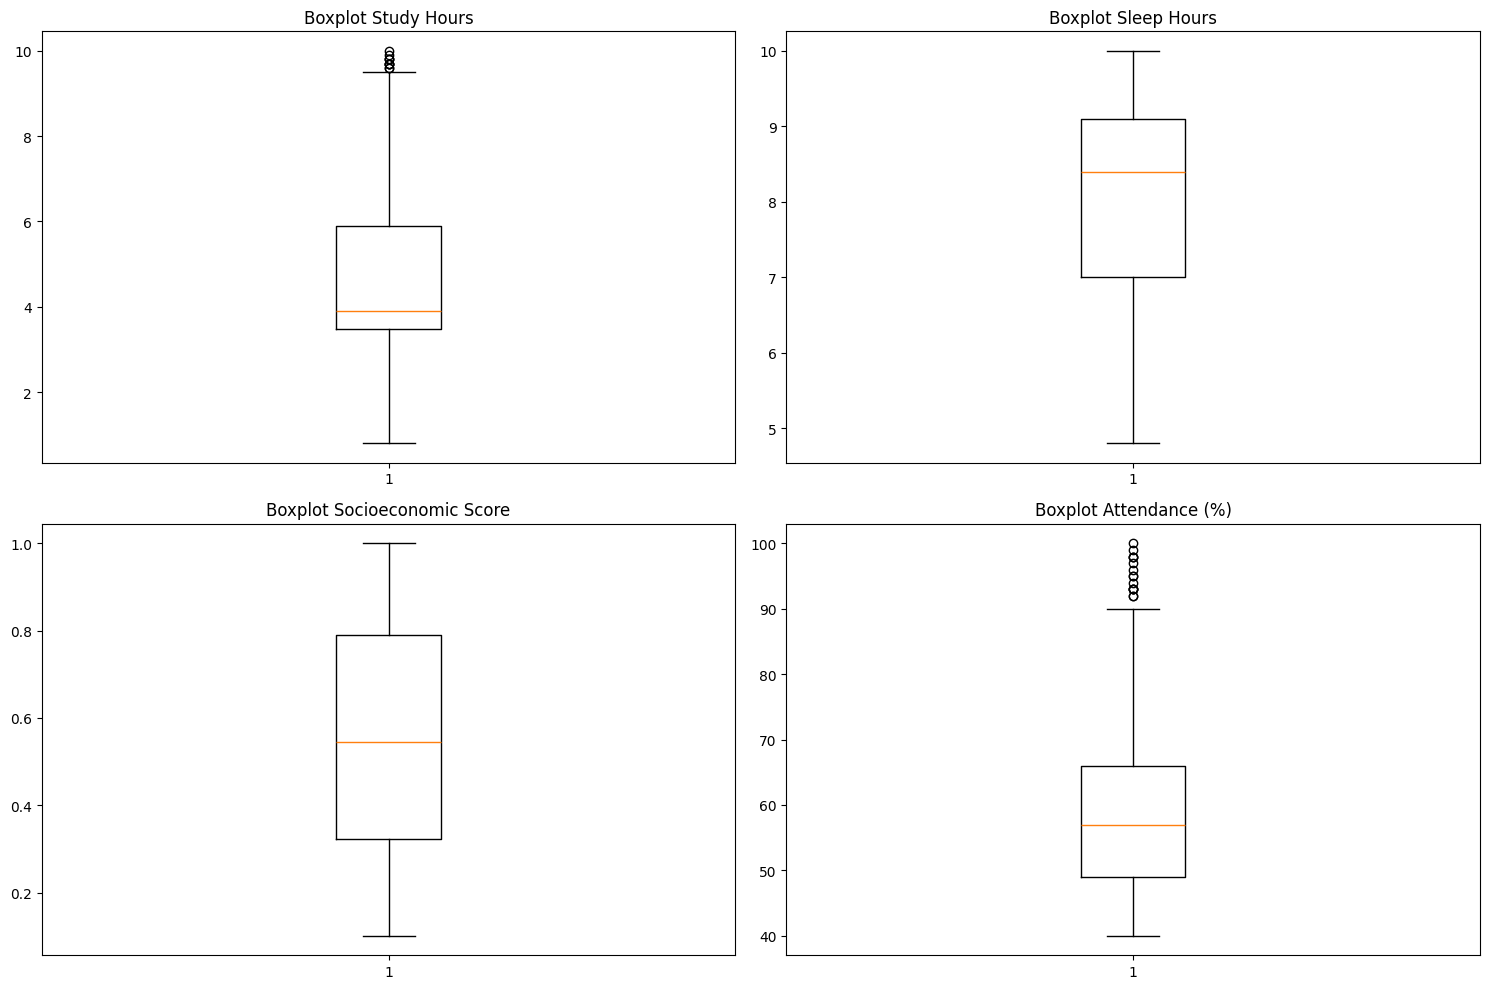

In [19]:
# Limpieza de datos
# Convertir Attendance a numérico quitamos % si existe
df['Attendance (%)'] = pd.to_numeric(df['Attendance (%)'], errors='coerce')

# Verificar outliers con boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()
cols = ['Study Hours', 'Sleep Hours', 'Socioeconomic Score', 'Attendance (%)']
for i, col in enumerate(cols):
    axes[i].boxplot(df[col].dropna())
    axes[i].set_title(f'Boxplot {col}')
plt.tight_layout()
plt.show()


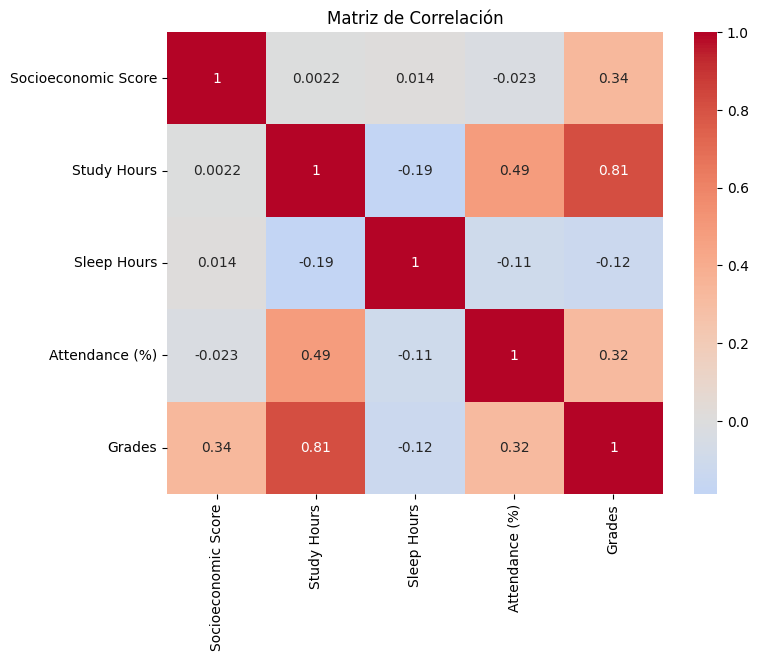


Correlaciones con Grades:
Grades                 1.000000
Study Hours            0.810807
Socioeconomic Score    0.335033
Attendance (%)         0.321930
Sleep Hours           -0.124689
Name: Grades, dtype: float64


In [20]:
# Matriz de correlacion
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

print("\nCorrelaciones con Grades:")
print(correlation_matrix['Grades'].sort_values(ascending=False))

In [21]:
#  Preparar datos para regresión
X = df[['Study Hours', 'Attendance (%)', 'Socioeconomic Score']]  # Mejores features por correlación
y = df['Grades']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos preparados:")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")

Datos preparados:
X_train shape: (1110, 3)
X_test shape: (278, 3)


In [22]:
#   Regresión Lineal

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("resultados de regresion lineal:")
print(f"R² Score: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.2f}")


resultados de regresion lineal:
R² Score: 0.7456
RMSE: 4.38


In [23]:
# modelo de regresion polinomial

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print("resultados regresion polinomial:")
print(f"R² Score: {r2_poly:.4f}")
print(f"RMSE: {rmse_poly:.2f}")
print(f"Mejora R²: {r2_poly - r2_lr:+.4f}")


resultados regresion polinomial:
R² Score: 0.9112
RMSE: 2.59
Mejora R²: +0.1656


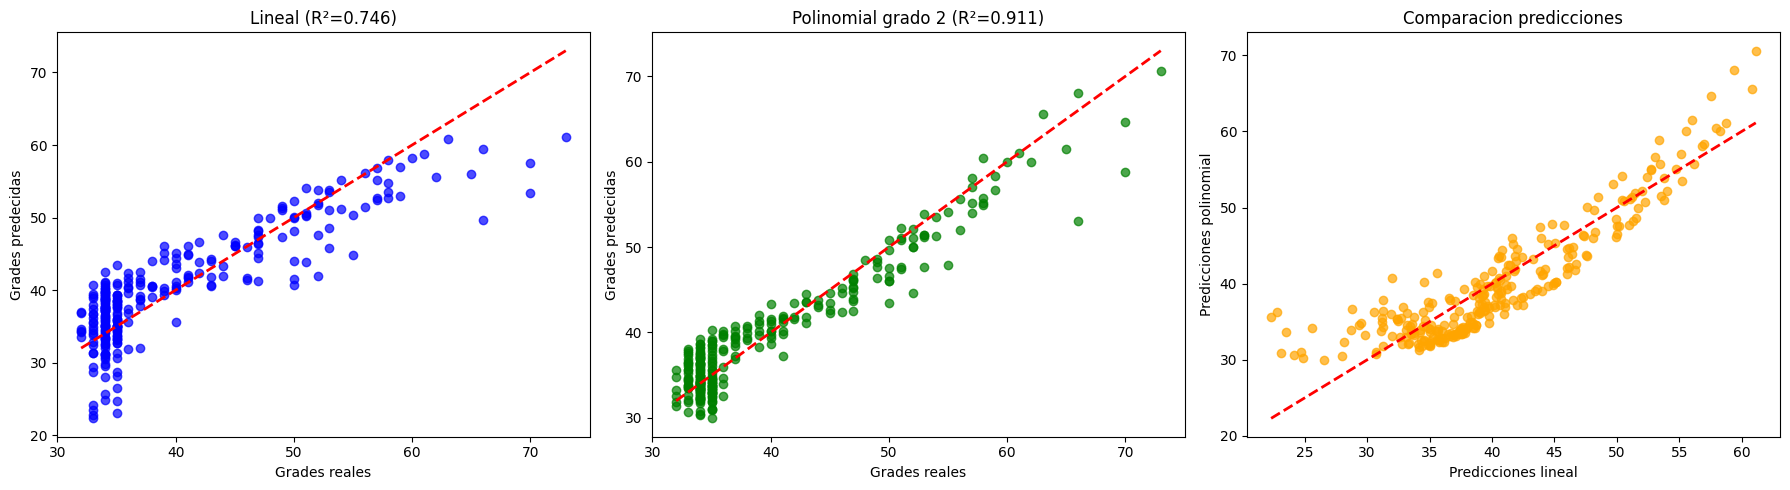

In [24]:
#  Graficos de comparación


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Regresión Lineal
axes[0].scatter(y_test, y_pred_lr, alpha=0.7, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Grades reales')
axes[0].set_ylabel('Grades predecidas')
axes[0].set_title(f'Lineal (R²={r2_lr:.3f})')

#  Regresión Polinomial
axes[1].scatter(y_test, y_pred_poly, alpha=0.7, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Grades reales')
axes[1].set_ylabel('Grades predecidas')
axes[1].set_title(f'Polinomial grado 2 (R²={r2_poly:.3f})')

# Comparación directa
axes[2].scatter(y_pred_lr, y_pred_poly, alpha=0.7, color='orange')
axes[2].plot([y_pred_lr.min(), y_pred_lr.max()], [y_pred_lr.min(), y_pred_lr.max()], 'r--', lw=2)
axes[2].set_xlabel('Predicciones lineal')
axes[2].set_ylabel('Predicciones polinomial')
axes[2].set_title('Comparacion predicciones')

plt.tight_layout()
plt.show()


In [25]:
# Prediccion
print(" PREDICCION: estudiante que estudia 9h/dia")
print("   (80% asistencia, Score socioeconómico=0.7)")

#  datos del nuevo estudiante
nuevo_estudiante = scaler.transform([[9, 80, 0.7]])
nuevo_estudiante_poly = poly.transform(nuevo_estudiante)

# Predecir
pred_lr = lr.predict(nuevo_estudiante)[0]
pred_poly = lr_poly.predict(nuevo_estudiante_poly)[0]

print(f"   Regresin lineal:    {pred_lr:.1f}")
print(f"   Regresion polinomial: {pred_poly:.1f}")
print(f"   Mejor modelo: {'Polinomial' if r2_poly > r2_lr else 'Lineal'} (R²={max(r2_lr, r2_poly):.4f})")


 PREDICCION: estudiante que estudia 9h/dia
   (80% asistencia, Score socioeconómico=0.7)
   Regresin lineal:    59.9
   Regresion polinomial: 64.0
   Mejor modelo: Polinomial (R²=0.9112)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
